**XGBoost for House Price Prediction**

✅ Step 1: Install & Import Libraries

In [1]:
# Install xgboost (if not already installed)
!pip install xgboost

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb


✅ Step 2: Load and Prepare Dataset

In [2]:
# Load the California housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name="Price")

# Optional: View top rows
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


✅ Step 3: Train-Test Split

In [3]:
# Split dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


✅ Step 4: Train XGBoost Regressor

In [4]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

✅ Step 5: Make Predictions

In [5]:
y_pred = xgb_model.predict(X_test)


✅ Step 6: Evaluate the Model

In [6]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.2225899267544737
R² Score: 0.8301370561019205


✅ Step 7: Plot Actual vs Predicted Prices

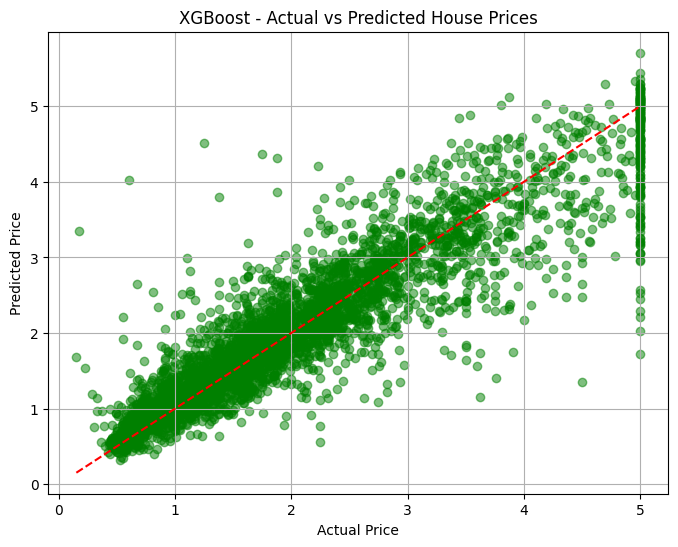

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBoost - Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


✅ Step 8: Plot Feature Importance

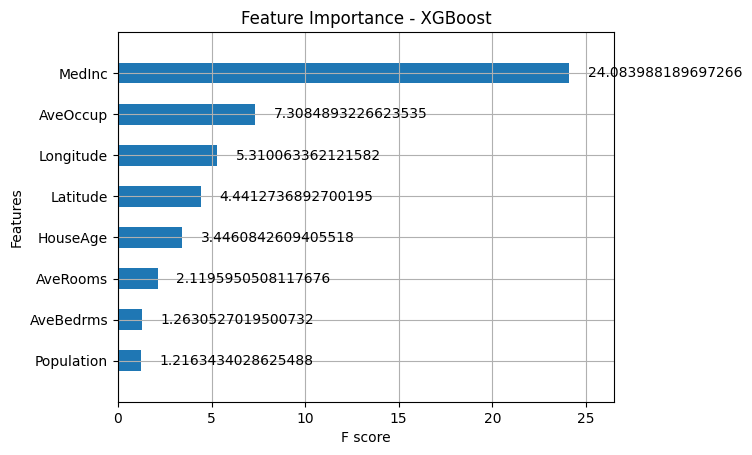

In [8]:
xgb.plot_importance(xgb_model, importance_type='gain', height=0.5)
plt.title("Feature Importance - XGBoost")
plt.show()
